<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/main/Classification_of_petal_iris_data_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
iris=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv")

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#creating new column 'versicolor', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
# new column added into dataframe
iris["versicolor"] = iris["Species"].apply(v_nv_fn)
iris[iris['versicolor']==0].shape


(50, 6)

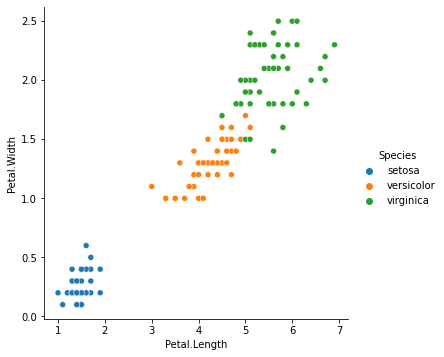

In [6]:
sns.pairplot(iris,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="Species",height=5)

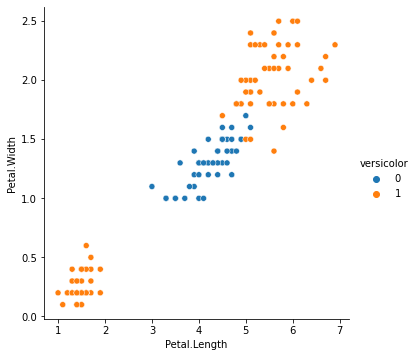

In [7]:
sns.pairplot(iris,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="versicolor",height=5)

In [10]:
#setting predictors and target
X = iris[["Petal.Length","Petal.Width"]]
Y = iris["versicolor"]
# model building
model = SVC()
model.fit(X,Y)
model.score(X,Y)

0.9533333333333334

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

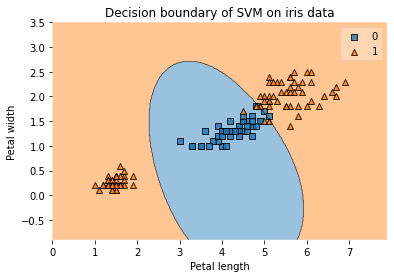

In [13]:
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')

Further, even though SVM is considered as a binary classifier, it can be used for multi-class classification as well. This is achieved in one of the 2 ways:

One-vs-One classification: It builds a binary classification model for each pair of classes. Thus, there will be n * (n-1) / 2 models, where n is the number of classes. So, if there are 3 classes (as in our case), then (3*2)/2=3 models are used.

One-vs-All classification: It compares every class with the remaining classes thereby building a model for every class. The class with the highest probability is chosen. So, if there are 3 classes (in our case) then 3 models are used.

The below demo shows the classification of Iris dataset using SVM for multiple classes – setosa, versicolor and virginica.

In [16]:
# encoding the species column
iris.loc[iris.Species=="setosa","Species"] = 0
iris.loc[iris.Species=="versicolor","Species"] = 1
iris.loc[iris.Species=="virginica","Species"] = 2
#data type (dtype) of the column will be converted to 'category'
iris.Species = iris.Species.astype("category") 
iris.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,versicolor
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [18]:
X = iris[["Petal.Length","Petal.Width"]]
Y = iris["Species"]
model = SVC()
model.fit(X,Y)

SVC()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

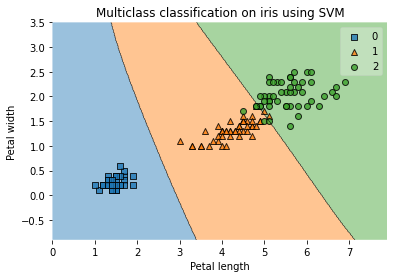

In [19]:
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')